## Time-series Analysis & Stationarity Check

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [4]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [5]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [6]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
106,Овцы и козы,Крестьянские или фермерские хозяйства,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,...,471.4,475.1,369.7,460.2,450.4,409.8,442.3,380,792.4,871.59
18,КРС,Сельхозпредприятия,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,...,1366.07,4009.21,1575.56,10529.94,1593.86,4331.39,8049.47,2910.8,2821.28,13033.74
350,Птицы,Сельхозпредприятия,ОБЛАСТЬ ҰЛЫТАУ,нет,нет,нет,нет,нет,нет,нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Свиньи,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,72.32,44.44,81.59,117.04,146.62,114.41,105.97,...,6.94,6.55,6.74,17.26,12.39,16.33,16.16,16.45,9.79,22.95
339,Птицы,Сельхозпредприятия,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,NaN,30.41,NaN,NaN,39.46


In [7]:
df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', '    АКМОЛИНСКАЯ ОБЛАСТЬ',
       '    АКТЮБИНСКАЯ ОБЛАСТЬ', '    АЛМАТИНСКАЯ ОБЛАСТЬ',
       '    АТЫРАУСКАЯ ОБЛАСТЬ', '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ЖАМБЫЛСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАСТАНА', '    ГАЛМАТЫ',
       '    ГШЫМКЕНТ', '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ ЖЕТІСУ',
       '    ОБЛАСТЬ ҰЛЫТАУ', '    ОБЛАСТЬ АБАЙ'], dtype=object)

In [8]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ', 'ГОРОД ШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ'], dtype=object)

In [9]:
# Filter the df
df = df[df['Показатель'] == "Птицы"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
369,Птицы,Крестьянские или фермерские хозяйства,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,0.1,0.1,0.1,0,NaN,0.1,NaN,0.2,0,0
360,Птицы,Крестьянские или фермерские хозяйства,КОСТАНАЙСКАЯ ОБЛАСТЬ,123.11,16.7,0.68,0.65,0.18,0.53,0.15,...,0.2,NaN,0,0.4,0,NaN,0.2,0,0,1.5
353,Птицы,Крестьянские или фермерские хозяйства,АКМОЛИНСКАЯ ОБЛАСТЬ,0,NaN,0.2,0.06,0.09,NaN,NaN,...,0.1,0.1,NaN,0.1,0,0.1,0.1,0.3,0.2,0.1
370,Птицы,Крестьянские или фермерские хозяйства,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,...,0.9,NaN,0.6,1,0.7,0,0,0,0,0
340,Птицы,Сельхозпредприятия,МАНГИСТАУСКАЯ ОБЛАСТЬ,0,NaN,NaN,NaN,NaN,NaN,NaN,...,842.52,855.84,710.09,641.57,667.37,921.96,379.6,601.52,808.27,754.21


In [10]:
# Sum only the last two columns, grouped by "Регион"
df_sum = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df_sum


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,672.81,658.57,469.77,813.94,534.59,772.47,807.17,852.52,1056.11,...,10969.85,10894.97,10238.97,12692.46,10379.17,10080.07,10273.59,10251.41,8665.21,11438.74
1,АКТЮБИНСКАЯ ОБЛАСТЬ,230.7,221.98,149.84,213.6,162.91,42.1,226.9,353.1,259.97,...,82.4,53.6,37.0,46.4,52.6,68.4,1.6,65.0,61.3,254.2
2,АЛМАТИНСКАЯ ОБЛАСТЬ,5624.73,5349.54,6376.58,6177.95,5994.1,7348.9,9177.65,6395.81,6796.17,...,12341.77,11359.95,11464.21,11091.93,12311.95,11018.07,10774.72,11765.56,12546.48,12207.96
3,АТЫРАУСКАЯ ОБЛАСТЬ,0,0,0,0.07,1.37,0,0.6,0,0.98,...,0,0,0,0,0,0,0,0,0,0.6
4,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,3619.09,3704.07,3782.03,4049.24,4034.68,3525.87,3419.28,3759.9,3652.82,...,6673.73,6217.87,6956.45,6264.3,5826.35,6144.41,5613.89,6157.31,6043.79,5998.19
5,ГОРОД АЛМАТЫ,5.17,1.17,0.82,1.06,0.38,0.24,0,0.6,0.53,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
6,ГОРОД АСТАНА,0.37,0.75,0.25,0.23,0.35,0.42,0.42,1.27,1.57,...,0,0,0.1,0,0,0,0,0,0,0
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,5.7,4.6,3.5,4.3,4.1,3.3,4.3,4.9,5.5,29.7
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,33.04,23.17,10.32,97.76,105.32,81.32,126.1,26.66,136.21,...,1289.81,1888.54,1709.14,1555.1,1561.05,1658.56,1816.86,2029.92,1865.53,2167.03
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,69.13,58.78,47.85,18.02,47.11,80.21,35.4,80.05,49.59,...,815.43,1176.48,1135.85,902.53,1132.8,1035.3,960.03,1059.99,1226.25,991.03


In [11]:
# convert date columns to datetime format
df_sum.columns = list(df_sum.columns[:1]) + list(pd.to_datetime(df_sum.columns[-120:]))
df_sum = df_sum.rename(columns={col: col.strftime("%Y-%m-%d") for col in df_sum.columns[-120:]})
df_sum.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
15,ОБЛАСТЬ ЖЕТІСУ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,7.4,175.4,235.4,254.0,117.1,13.8,9.8,140.7,58.1,57.2
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,69.13,58.78,47.85,18.02,47.11,80.21,35.4,80.05,49.59,...,815.43,1176.48,1135.85,902.53,1132.8,1035.3,960.03,1059.99,1226.25,991.03
10,КАРАГАНДИНСКАЯ ОБЛАСТЬ,912.19,949.26,807.54,930.49,798.69,833.02,871.43,977.17,896.3,...,1155.23,972.4,1034.85,894.67,859.41,977.18,1036.95,1137.79,934.12,1132.22
1,АКТЮБИНСКАЯ ОБЛАСТЬ,230.7,221.98,149.84,213.6,162.91,42.1,226.9,353.1,259.97,...,82.4,53.6,37.0,46.4,52.6,68.4,1.6,65.0,61.3,254.2
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,5.7,4.6,3.5,4.3,4.1,3.3,4.3,4.9,5.5,29.7


C:\Users\Acer\AppData\Local\Temp\ipykernel_19276\2611807932.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sum.replace("нетнетнет", np.nan, inplace=True)


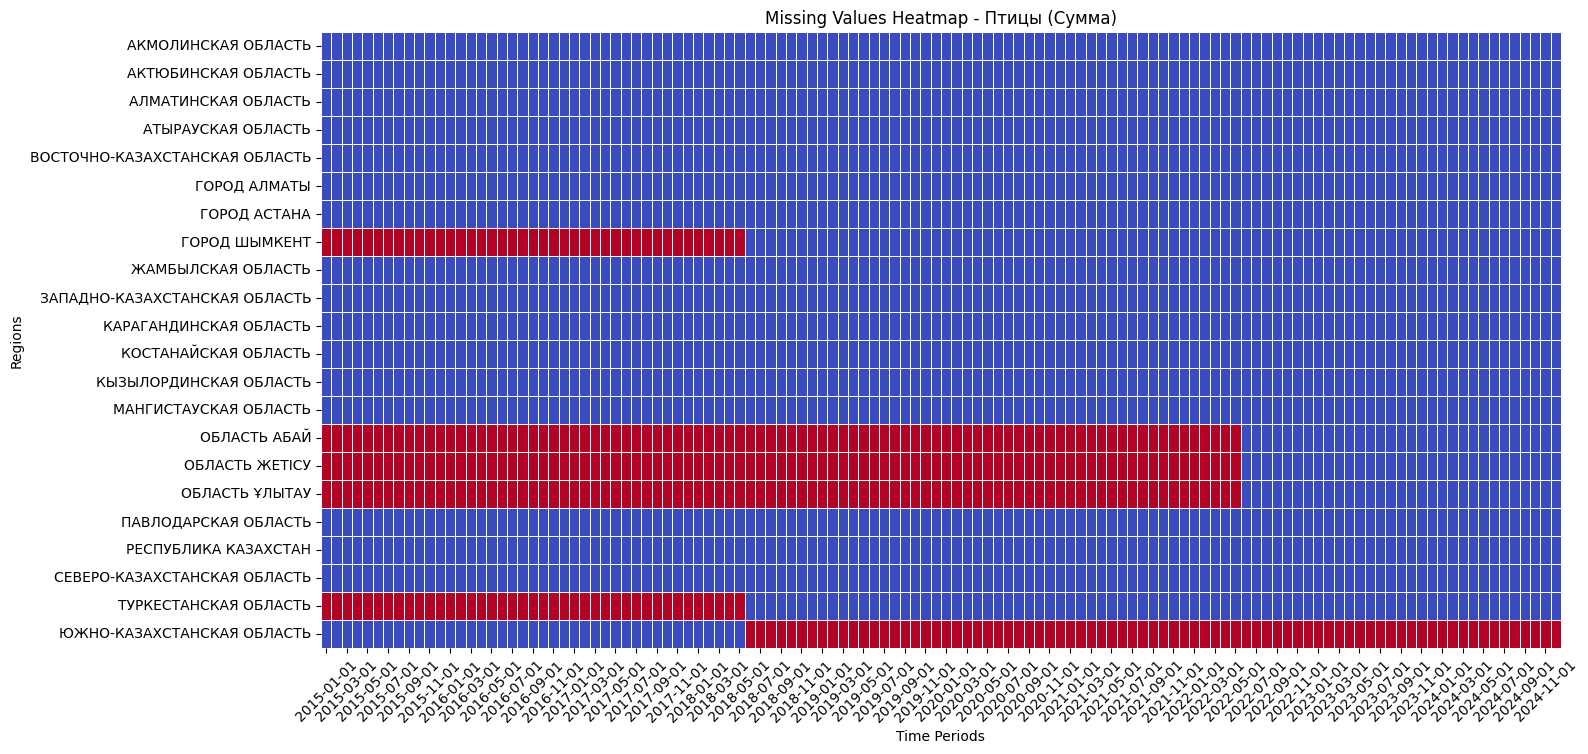

In [12]:
# Replace "нетнетнет" with NaN for easier handling
df_sum.replace("нетнетнет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_sum_numeric = df_sum.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_sum_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Птицы (Сумма)')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Convert from wide format to long format
df_sum_melted = df_sum.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_sum_melted.sample(5)

,Регион,Месяц,Объем
160,ГОРОД АСТАНА,2015-08-01,1.27
930,ГОРОД АСТАНА,2018-07-01,0.15
462,АКМОЛИНСКАЯ ОБЛАСТЬ,2016-10-01,1541.00
1722,ГОРОД АСТАНА,2021-07-01,0.00
1964,ГОРОД АСТАНА,2022-06-01,0.10


In [14]:
# Convert date column to datetime
df_sum_melted["Месяц"] = pd.to_datetime(df_sum_melted["Месяц"])

# Set index for time-series analysis
df_sum_melted = df_sum_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_sum_melted

Объем
Регион                     Месяц             
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  672.81
                           2015-02-01  658.57
                           2015-03-01  469.77
                           2015-04-01  813.94
                           2015-05-01  534.59
...                                       ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01     NaN
                           2024-09-01     NaN
                           2024-10-01     NaN
                           2024-11-01     NaN
                           2024-12-01     NaN

[2640 rows x 1 columns]

In [15]:
# Replace "нет" with NaN
df_sum_melted = df_sum_melted.replace("нетнетнет", np.nan)
df_sum_melted.isna().groupby("Регион").mean() * 100

,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


In [16]:
# Filter the df
df_shp = df[(df['Показатель'] == "Птицы") & (df['Категория хозяйства'] == "Сельхозпредприятия")]
df_shp = df_shp.drop(columns=["Показатель", "Категория хозяйства"])
df_shp = df_shp.sort_values(by="Регион", ascending=True)

df_shp.sample(5)


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
331,АКМОЛИНСКАЯ ОБЛАСТЬ,650.97,639.44,435.8,775.27,512.46,677.56,756.2,817.46,1008.9,...,10953.45,10846.37,10210.37,12681.96,10327.67,10032.07,10201.89,10113.41,8558.21,11275.74
330,РЕСПУБЛИКА КАЗАХСТАН,13243.04,12270.11,13403.3,13794.88,13848.19,13868.34,16072.64,13436.63,14140.78,...,38738.76,37718.58,36821.48,36953.97,36280.31,36291.87,34984.23,37659.15,36492.45,38913.45
341,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,1501.3,683.9,1143.5,770.7,1340.62,807.1,976.4,635.61,1138.5,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
348,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,877.78,561.63,295.3,267.82,681.1,643,636.62,637.24,584,486.54
344,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,3616.7,3701.2,3765.25,4047.3,4018.3,3461.34,3380.02,3715.82,3563.81,...,6671.63,6212.87,6955.05,6255.4,5822.25,6134.61,5602.99,6149.31,6037.39,5949.29


C:\Users\Acer\AppData\Local\Temp\ipykernel_19276\1799203455.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shp.replace("нет", np.nan, inplace=True)


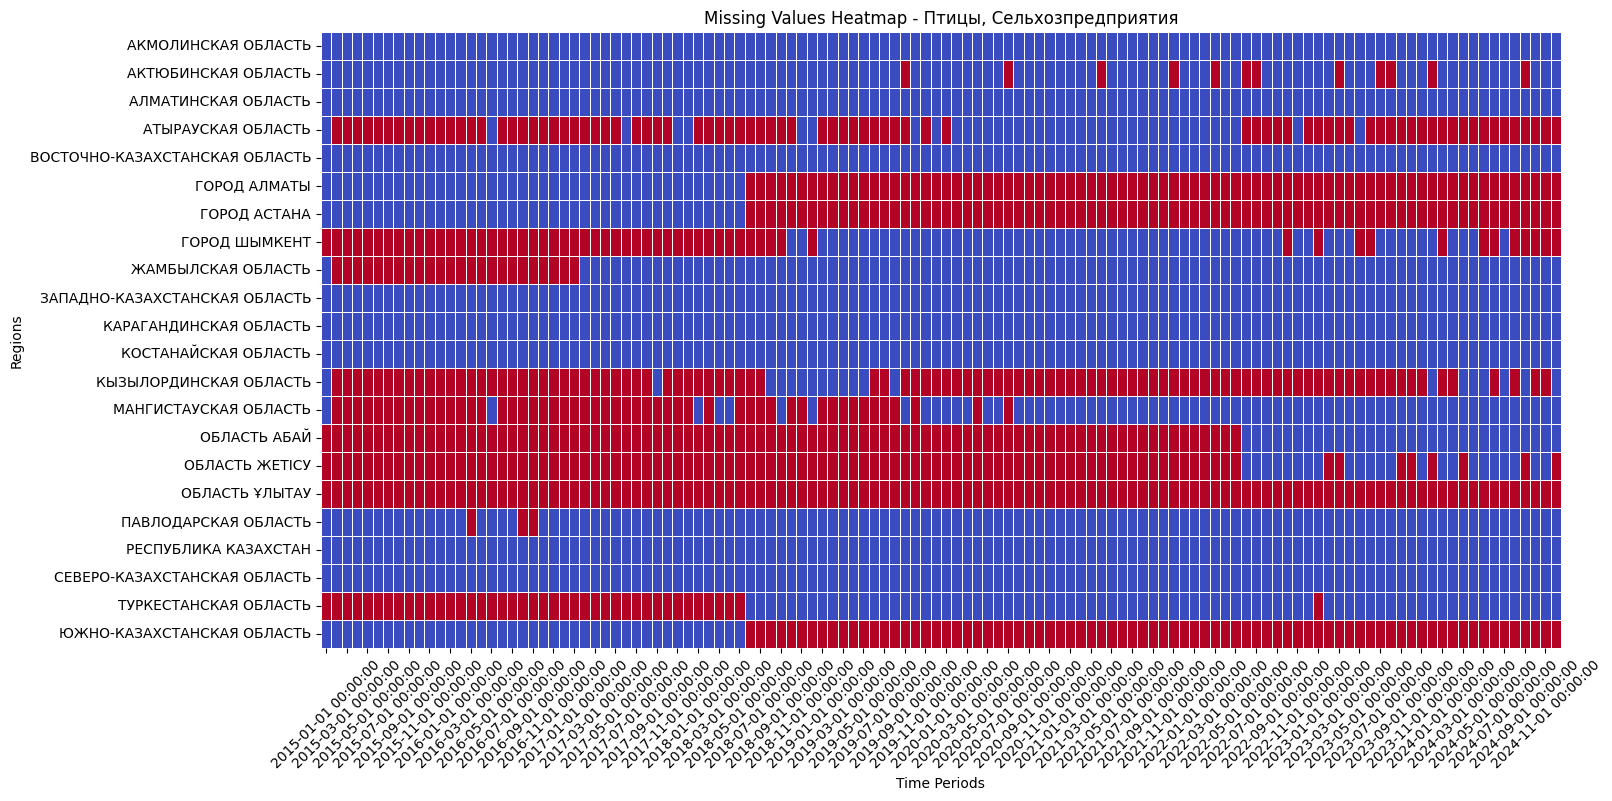

In [17]:
# Replace "нетнетнет" with NaN for easier handling
df_shp.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_shp_numeric = df_shp.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_shp_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Птицы, Сельхозпредприятия')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Filter the df
df_kfh = df[(df['Показатель'] == "Птицы") & (df['Категория хозяйства'] == "Крестьянские или фермерские хозяйства")]
df_kfh = df_kfh.drop(columns=["Показатель", "Категория хозяйства"])
df_kfh = df_kfh.sort_values(by="Регион", ascending=True)

df_kfh.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
357,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0,NaN,35.2,0.03,NaN,6.92,0.52,0.9,18.24,...,NaN,NaN,NaN,1.4,0.1,0.2,1.5,1.4,0.6,6.2
363,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,NaN,NaN,0.9,0.2,1.1,0.6,NaN,0.16,NaN,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
356,АТЫРАУСКАЯ ОБЛАСТЬ,0,NaN,NaN,NaN,1.1,NaN,0.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
355,АЛМАТИНСКАЯ ОБЛАСТЬ,0,NaN,3.5,NaN,NaN,NaN,9.8,NaN,12.61,...,NaN,24.3,6.7,18,2.8,12.5,6.9,13.6,10.5,10.1
354,АКТЮБИНСКАЯ ОБЛАСТЬ,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0.7,NaN,1.5


C:\Users\Acer\AppData\Local\Temp\ipykernel_19276\2700617725.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kfh.replace("нет", np.nan, inplace=True)


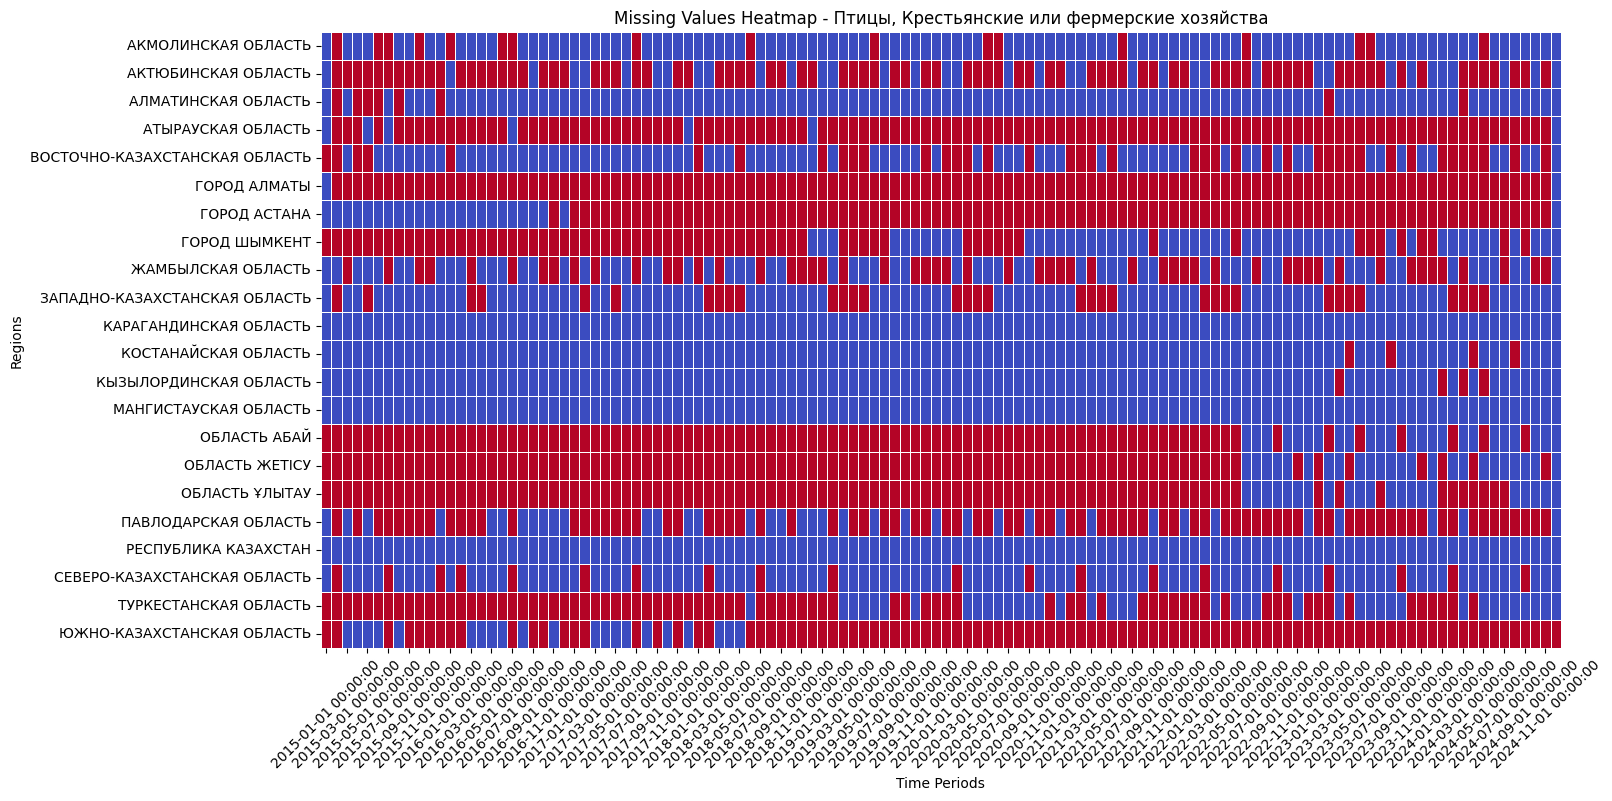

In [19]:
# Replace "нетнетнет" with NaN for easier handling
df_kfh.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_kfh_numeric = df_kfh.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_kfh_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Птицы, Крестьянские или фермерские хозяйства')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Filter the df
df_hn = df[(df['Показатель'] == "Птицы") & (df['Категория хозяйства'] == "Хозяйства населения")]
df_hn = df_hn.drop(columns=["Показатель", "Категория хозяйства"])
df_hn = df_hn.sort_values(by="Регион", ascending=True)

df_hn.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
374,РЕСПУБЛИКА КАЗАХСТАН,304.11,234.05,310.4,367.37,347.35,530.58,493.71,431.89,706.75,...,120.3,175.4,130,289,302,252.9,328.5,548.1,634.3,1280.9
383,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,0,0.16,0.62,1.07,1.3,0.93,0.51,0.56,0.66,...,0.8,0.3,0.6,0.3,0.5,0.7,1,1.6,1.1,1.6
375,АКМОЛИНСКАЯ ОБЛАСТЬ,21.84,19.13,33.77,38.61,22.04,94.91,50.97,34.99,47.08,...,16.3,48.5,28.6,10.4,51.5,47.9,71.6,137.7,106.8,162.9
379,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,9.09,2.86,5.04,9.83,9.13,43.55,14.28,11.28,23.9,...,1.5,4.4,2,14,6.9,5.5,17,26.6,33.7,29.3
377,АЛМАТИНСКАЯ ОБЛАСТЬ,12.6,15.2,33.7,44.4,15,40,25.9,63.7,39.18,...,0.1,NaN,7.8,16,1.7,5.7,3.8,0.1,10.8,4


C:\Users\Acer\AppData\Local\Temp\ipykernel_19276\4016030475.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hn.replace("нет", np.nan, inplace=True)


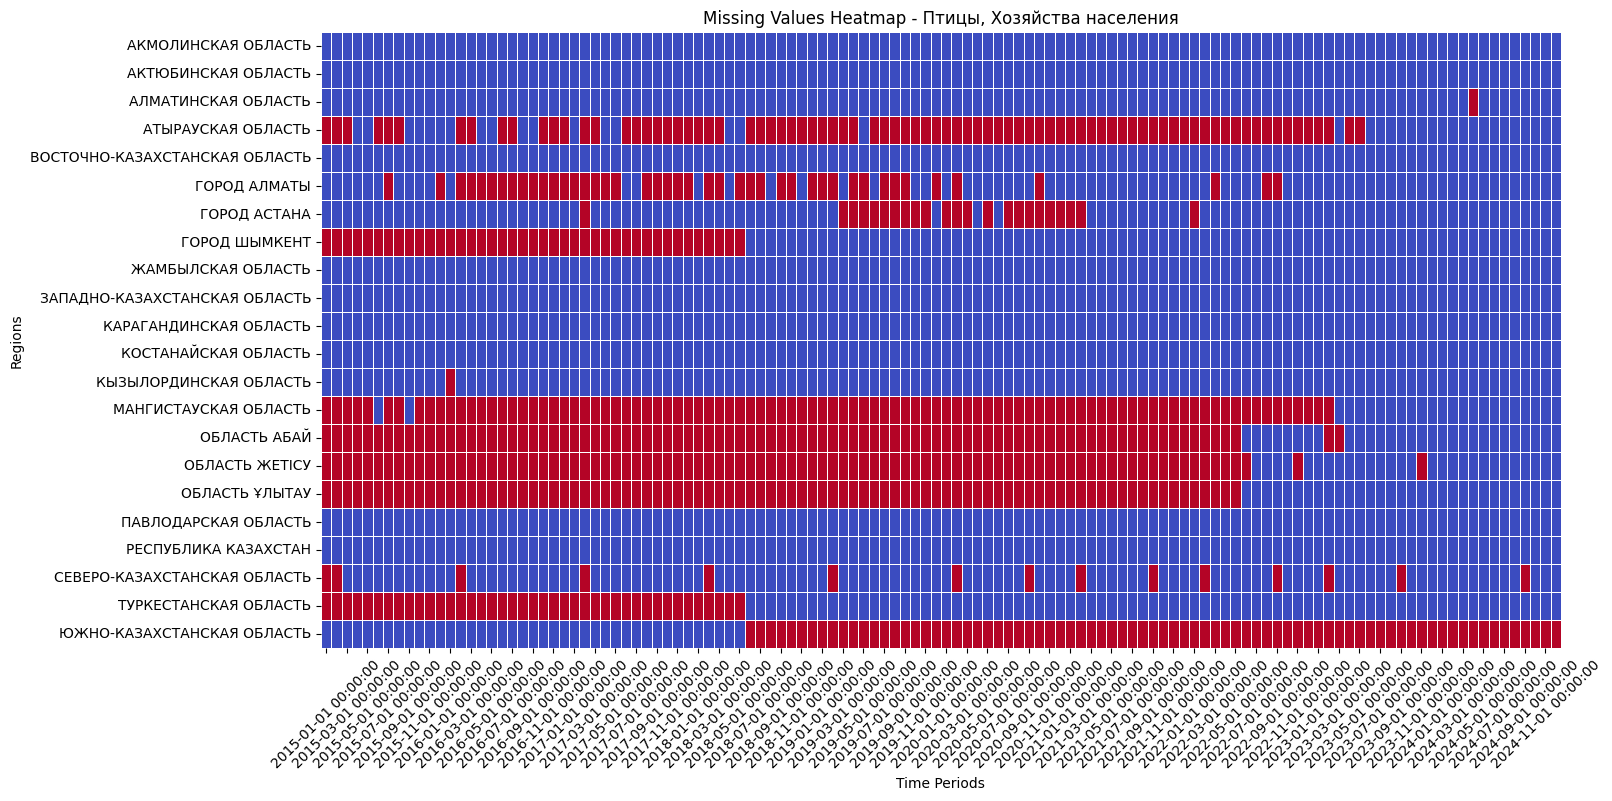

In [21]:
# Replace "нетнетнет" with NaN for easier handling
df_hn.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_hn_numeric = df_hn.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_hn_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Птицы, Хозяйства населения')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [22]:
df_sum_melted

Объем
Регион                     Месяц             
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  672.81
                           2015-02-01  658.57
                           2015-03-01  469.77
                           2015-04-01  813.94
                           2015-05-01  534.59
...                                       ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01     NaN
                           2024-09-01     NaN
                           2024-10-01     NaN
                           2024-11-01     NaN
                           2024-12-01     NaN

[2640 rows x 1 columns]

In [23]:
# Reset index if needed
df_stats = df_sum_melted.reset_index()

# Calculate basic descriptive stats for each region
region_stats = df_stats.groupby("Регион")["Объем"].agg([
    "count", "min", "max", "mean", "median", "std"
]).rename(columns={
    "count": "Кол-во значений",
    "min": "Мин.",
    "max": "Макс.",
    "mean": "Среднее",
    "median": "Медиана",
    "std": "Ст. откл."
})

# Display result
display(region_stats.sort_values(by="Среднее", ascending=False))


,Кол-во значений,Мин.,Макс.,Среднее,Медиана,Ст. откл.
Регион,,,,,,
РЕСПУБЛИКА КАЗАХСТАН,120,12524.88,40228.95,24823.019667,24269.765,7489.704369
АЛМАТИНСКАЯ ОБЛАСТЬ,120,4631.31,14096.10,8595.857833,8499.115,1795.490595
АКМОЛИНСКАЯ ОБЛАСТЬ,120,469.77,12692.46,5591.317750,5389.245,3679.804179
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120,2892.05,6956.45,4833.678583,4600.330,900.083687
ОБЛАСТЬ АБАЙ,31,1693.80,2312.50,1933.535806,1881.950,158.641315
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,41,614.13,1699.00,1131.650976,1237.700,314.522283
КАРАГАНДИНСКАЯ ОБЛАСТЬ,120,578.17,1463.42,871.337583,859.500,140.211999
ТУРКЕСТАНСКАЯ ОБЛАСТЬ,79,61.66,1646.30,801.610380,818.370,407.399736
ЖАМБЫЛСКАЯ ОБЛАСТЬ,120,10.27,2167.03,761.847833,665.315,572.637948


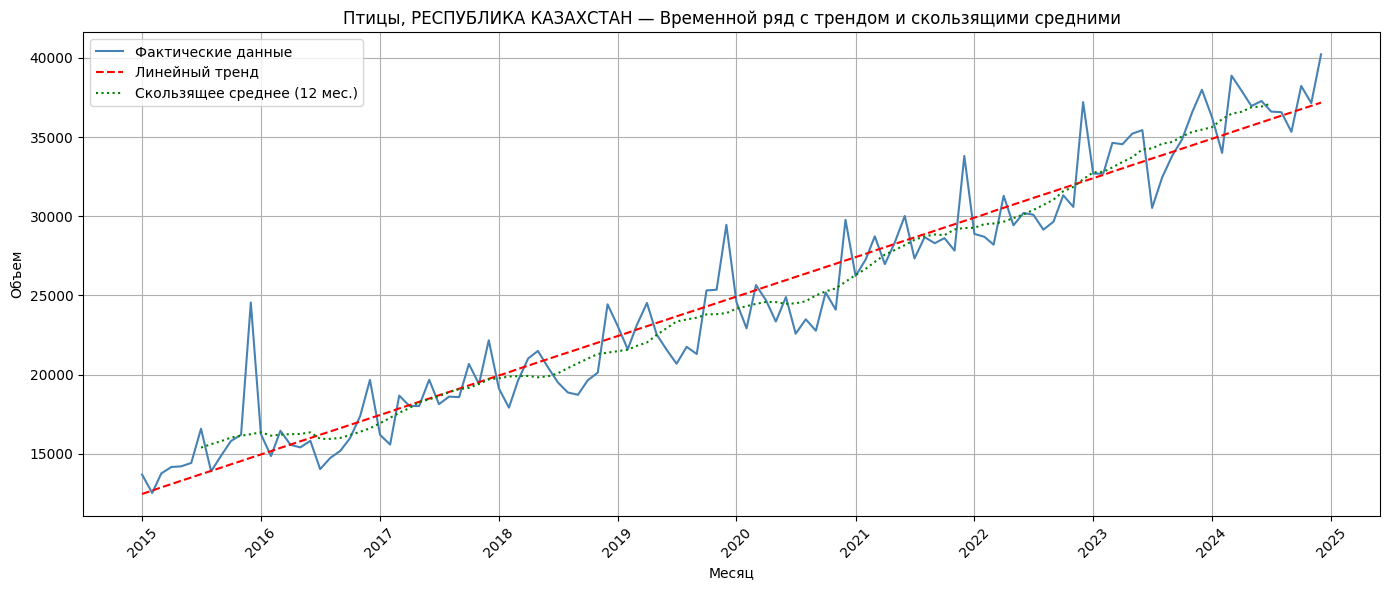

In [24]:
# Filter for national level
national_data = df_stats[df_stats["Регион"] == "РЕСПУБЛИКА КАЗАХСТАН"].copy()

# Ensure 'Месяц' is datetime
national_data["Месяц"] = pd.to_datetime(national_data["Месяц"])

# Create time index as integer (months since start)
national_data = national_data.sort_values("Месяц")
national_data["t"] = range(len(national_data))  # 0, 1, 2, ..., N

# Trend line
coeffs = np.polyfit(national_data["t"], national_data["Объем"], deg=1)
trend = np.poly1d(coeffs)

# Moving Averages
national_data["MA_12"] = national_data["Объем"].rolling(window=12, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))

# Actual data
plt.plot(national_data["Месяц"], national_data["Объем"], label="Фактические данные", color="steelblue")

# Trend line
plt.plot(national_data["Месяц"], trend(national_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# Moving Averages
plt.plot(national_data["Месяц"], national_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# Labels and style
plt.title("Птицы, РЕСПУБЛИКА КАЗАХСТАН — Временной ряд с трендом и скользящими средними")
plt.xlabel("Месяц")
plt.ylabel("Объем")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

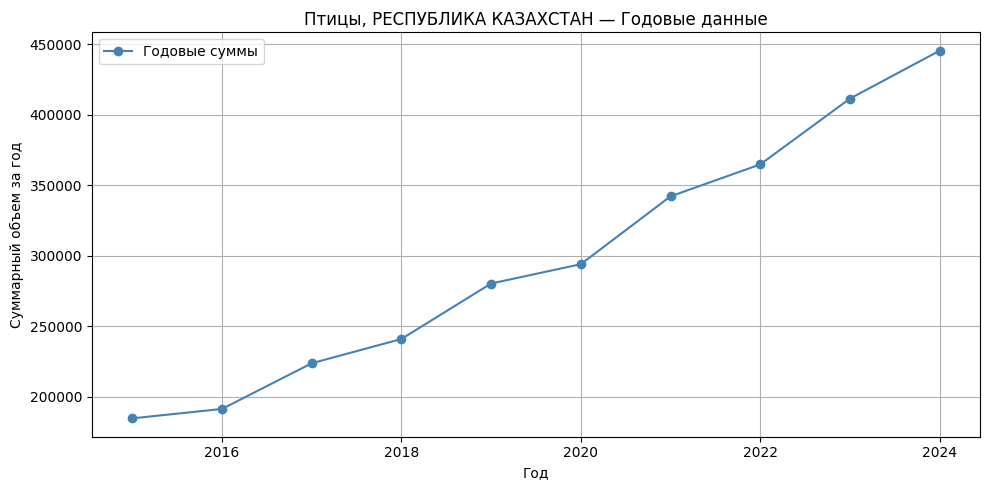

In [25]:
# Aggregate by year (sum)
national_data["Год"] = national_data["Месяц"].dt.year
annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Actual yearly data
plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# Labels and style
plt.title("Птицы, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные")
plt.xlabel("Год")
plt.ylabel("Суммарный объем за год")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# # Filter for national level
# aktobe_data = df_stats[df_stats["Регион"] == "АКТЮБИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# aktobe_data["Месяц"] = pd.to_datetime(aktobe_data["Месяц"])

# # Create time index as integer (months since start)
# aktobe_data = aktobe_data.sort_values("Месяц")
# aktobe_data["t"] = range(len(aktobe_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(aktobe_data["t"], aktobe_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# aktobe_data["MA_12"] = aktobe_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(aktobe_data["Месяц"], aktobe_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(aktobe_data["Месяц"], trend(aktobe_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(aktobe_data["Месяц"], aktobe_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКТЮБИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [25]:
# # Filter for national level
# akmola_data = df_stats[df_stats["Регион"] == "АКМОЛИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# akmola_data["Месяц"] = pd.to_datetime(akmola_data["Месяц"])

# # Create time index as integer (months since start)
# akmola_data = akmola_data.sort_values("Месяц")
# akmola_data["t"] = range(len(akmola_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(akmola_data["t"], akmola_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# akmola_data["MA_12"] = akmola_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(akmola_data["Месяц"], akmola_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(akmola_data["Месяц"], trend(akmola_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(akmola_data["Месяц"], akmola_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКМОЛИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [26]:
# # Filter for national level
# kyzylorda_data = df_stats[df_stats["Регион"] == "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# kyzylorda_data["Месяц"] = pd.to_datetime(kyzylorda_data["Месяц"])

# # Create time index as integer (months since start)
# kyzylorda_data = kyzylorda_data.sort_values("Месяц")
# kyzylorda_data["t"] = range(len(kyzylorda_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(kyzylorda_data["t"], kyzylorda_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# kyzylorda_data["MA_12"] = kyzylorda_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(kyzylorda_data["Месяц"], trend(kyzylorda_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()